# Titanic Dataset Experiment
## Henry Salgado
### May 2025

In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt


In [132]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [133]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [134]:
df = df.drop(columns=["deck"])
df = df.dropna()



In [135]:
df['sex'].value_counts()

male      453
female    259
Name: sex, dtype: int64

Let's one-hot encode categorical data 

In [136]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['embarked'] = LabelEncoder().fit_transform(df['embarked']) 


In [137]:
df['sex'].value_counts()

1    453
0    259
Name: sex, dtype: int64

In [138]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=16)


In [141]:
X_train.shape[1]

7

In [142]:

class TitanicNN(nn.Module):
    def __init__(self, input_dim):
       super(TitanicNN, self).__init__()
       self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
)

    def forward(self, x):
        return self.net(x)


input_dim = X_train.shape[1]
model = TitanicNN(input_dim)



In [143]:
class TitanicNN(nn.Module):
    def __init__(self, input_dim):
       super(TitanicNN, self).__init__()
       self.fc1 = nn.Linear(input_dim, 32)
       self.fc2 = nn.Linear(32, 64)
       self.fc3 = nn.ReLU()
       self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)


        return x


input_dim = X_train.shape[1]
model = TitanicNN(input_dim)

In [144]:
# Loss funct 
criterion = nn.BCEWithLogitsLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [145]:
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}')


Epoch [1/100], Loss: 22.0735
Epoch [2/100], Loss: 17.7073
Epoch [3/100], Loss: 16.1664
Epoch [4/100], Loss: 15.6023
Epoch [5/100], Loss: 15.3539
Epoch [6/100], Loss: 15.1523
Epoch [7/100], Loss: 14.9531
Epoch [8/100], Loss: 14.7436
Epoch [9/100], Loss: 14.7091
Epoch [10/100], Loss: 14.4633
Epoch [11/100], Loss: 14.4330
Epoch [12/100], Loss: 14.2851
Epoch [13/100], Loss: 14.3266
Epoch [14/100], Loss: 14.0497
Epoch [15/100], Loss: 14.2475
Epoch [16/100], Loss: 14.0137
Epoch [17/100], Loss: 14.0921
Epoch [18/100], Loss: 13.8449
Epoch [19/100], Loss: 13.8283
Epoch [20/100], Loss: 13.7953
Epoch [21/100], Loss: 14.0170
Epoch [22/100], Loss: 13.7913
Epoch [23/100], Loss: 13.7954
Epoch [24/100], Loss: 13.7048
Epoch [25/100], Loss: 13.8356
Epoch [26/100], Loss: 13.6016
Epoch [27/100], Loss: 13.7051
Epoch [28/100], Loss: 13.5839
Epoch [29/100], Loss: 13.5538
Epoch [30/100], Loss: 13.5371
Epoch [31/100], Loss: 13.4867
Epoch [32/100], Loss: 13.3552
Epoch [33/100], Loss: 13.6302
Epoch [34/100], Los

In [146]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for xb, yb in test_loader:
        outputs = model(xb)
        predictions = (torch.sigmoid(outputs) >= 0.5).float()
        correct += (predictions == yb).sum().item()
        total += yb.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 79.02%


Depth=2, working on node 7: 100%|██████████| 8/8 [00:00<00:00, 662.20it/s] 

_______PC_______


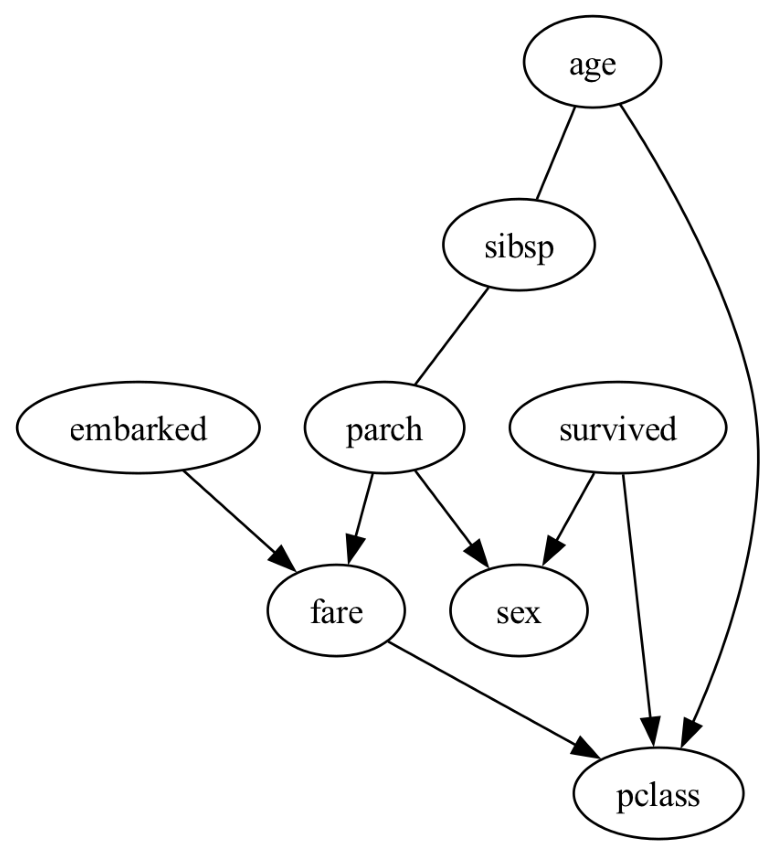

In [147]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.cit import fisherz, chisq
import matplotlib.pyplot as plt
from causallearn.utils.GraphUtils import GraphUtils
from IPython.display import Image, display
import pandas as pd

all_features = pd.concat([X, y], axis=1)


X_np = all_features.to_numpy()
col_names = list(all_features.columns)


print("_______PC_______")
cg_pc = pc(X_np, alpha=0.01, ci_test=fisherz,  node_names=col_names)

# Visualize PC Graph
cg_pc.draw_pydot_graph()

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


In [149]:
y_train_np = y_train.numpy().ravel()
y_test_np = y_test.numpy().ravel()


clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train.numpy(), y_train_np)


AttributeError: 'Series' object has no attribute 'numpy'

In [ ]:
y_pred = clf.predict(X_test.numpy())

print("Accuracy:", accuracy_score(y_test_np, y_pred))
print("\nClassification Report:\n", classification_report(y_test_np, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_np, y_pred))


Accuracy: 0.7062937062937062

Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.84      0.76        80
         1.0       0.72      0.54      0.62        63

    accuracy                           0.71       143
   macro avg       0.71      0.69      0.69       143
weighted avg       0.71      0.71      0.70       143


Confusion Matrix:
 [[67 13]
 [29 34]]


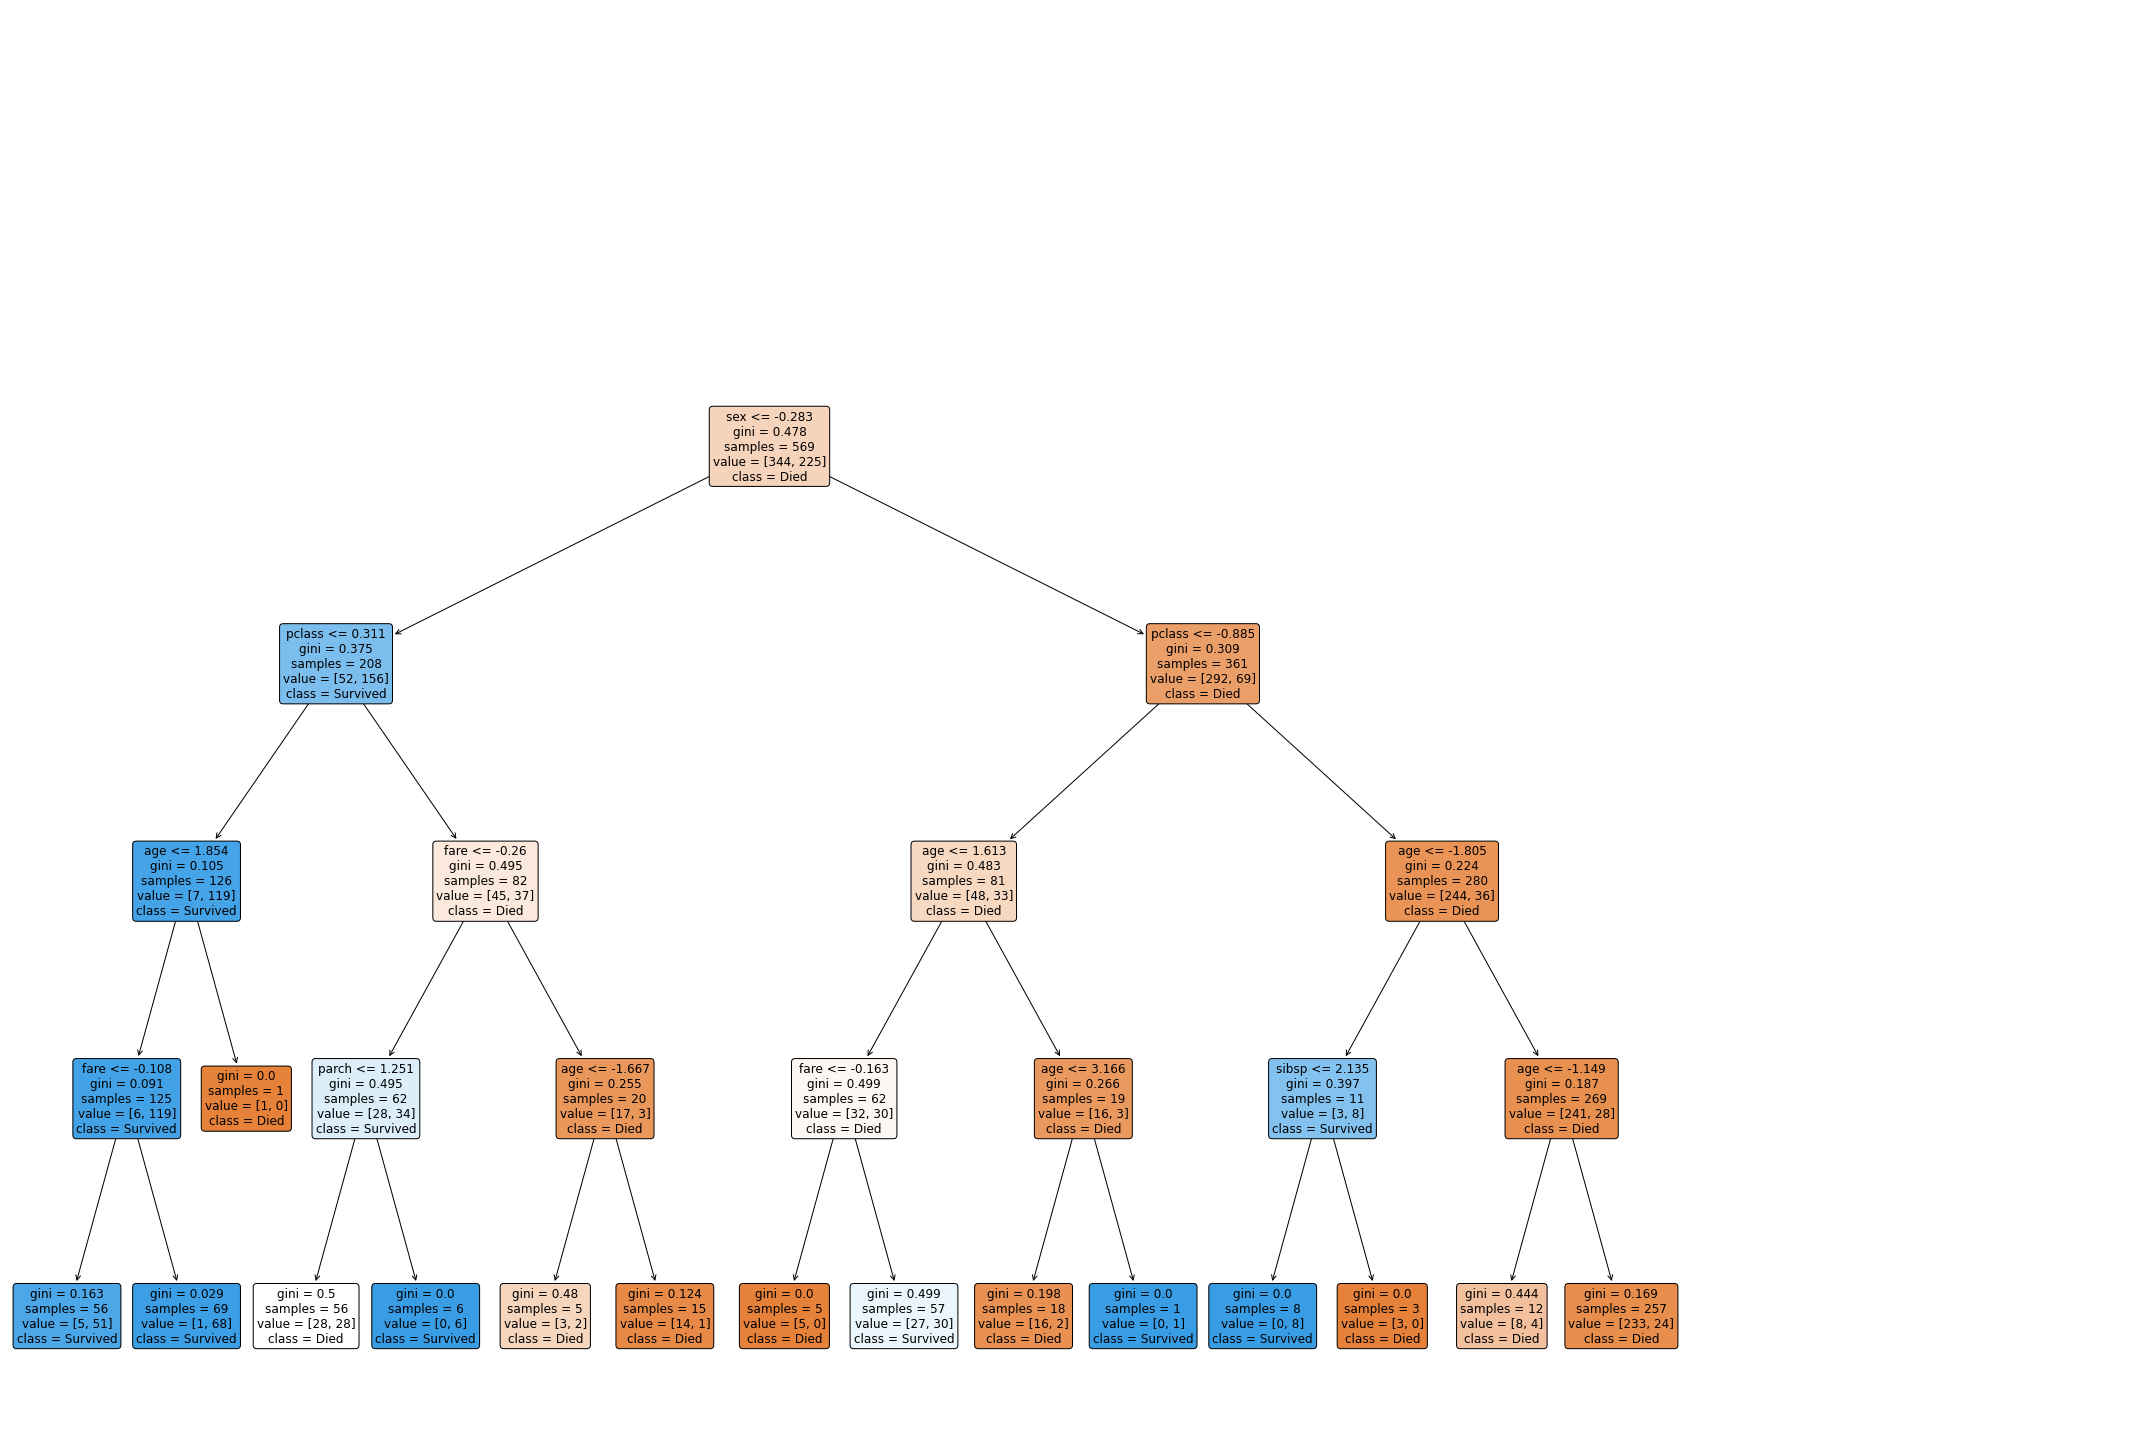

In [ ]:
plt.figure(figsize=(30, 20))
tree.plot_tree(clf, 
               feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], 
               class_names=['Died', 'Survived'],
               filled=True,
               rounded=True)
plt.show()


    Feature  Importance
1       sex    0.557417
0    pclass    0.229486
2       age    0.113249
5      fare    0.052018
3     sibsp    0.029507
4     parch    0.018323
6  embarked    0.000000


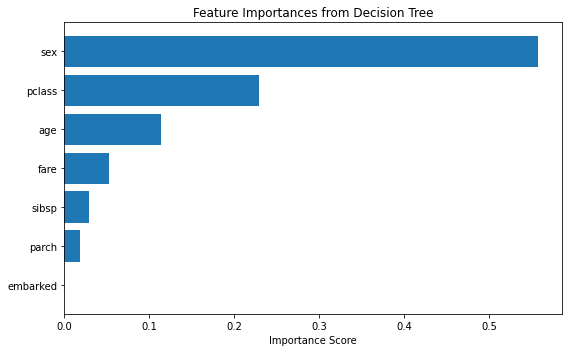

In [ ]:
feature_names = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']


importances = clf.feature_importances_

feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importances)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(feat_importances['Feature'], feat_importances['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importances from Decision Tree')
plt.gca().invert_yaxis()
plt.show()